Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

#metricas
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#modelo
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Importando e explorando os dados

In [48]:
base_census = pd.read_csv('/content/census.csv')
base_census.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [ ]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [49]:
base_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Gerando algumas visualizações

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



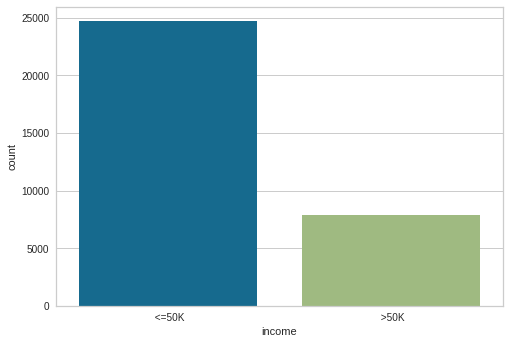

In [ ]:
sns.countplot(base_census['income']);

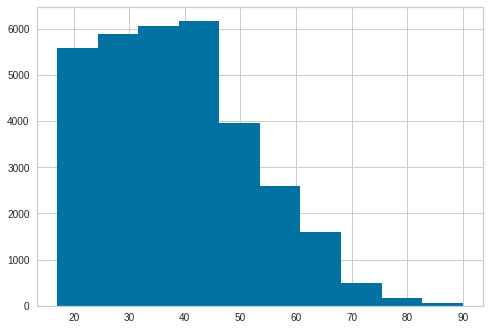

In [ ]:
plt.hist(x=base_census['age']);

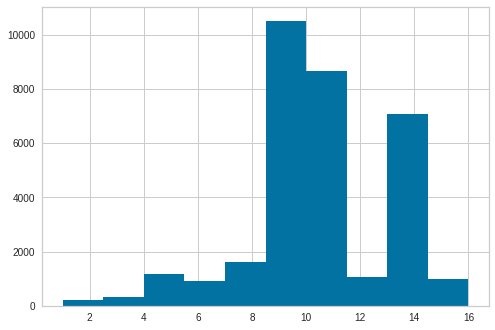

In [ ]:
plt.hist(x=base_census['education-num']);

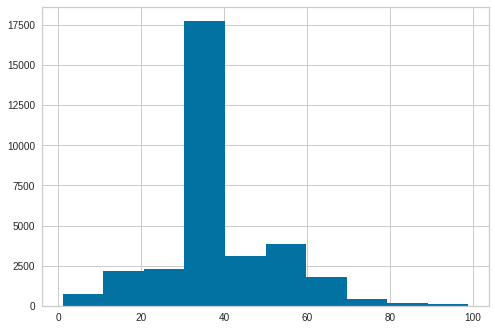

In [ ]:
plt.hist(x=base_census['hour-per-week']);

In [ ]:
#visualiazndo o agrupamento das variaveis
graf = px.treemap(base_census, path=['workclass','age'])
graf.show()

In [ ]:
graf = px.treemap(base_census, path=['occupation','relationship', 'age'])
graf.show()

In [ ]:
graf = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
graf.show()

In [ ]:
graf = px.parallel_categories(base_census, dimensions=['occupation', 'relationship','income'])
graf.show()

In [ ]:
graf = px.parallel_categories(base_census, dimensions=['education','income'])
graf.show()

Dividindo a base de dados entre Previsores(x) e a Classe(y)

In [ ]:
x_census = base_census.iloc[:, 0:14].values
y_census = base_census.iloc[:, 14].values

Transformando os atributos categóricos em numéricos

In [ ]:
#LabelEncoder - criando as instâncias
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

#aplicando as transformações
x_census[: , 1] = label_encoder_workclass .fit_transform(x_census[:, 1])
x_census[: , 3] = label_encoder_education .fit_transform(x_census[:, 3])
x_census[: , 5] = label_encoder_marital .fit_transform(x_census[:, 5])
x_census[: , 6] = label_encoder_occupation .fit_transform(x_census[:, 6])
x_census[: , 7] = label_encoder_relationship .fit_transform(x_census[:, 7])
x_census[: , 8] = label_encoder_race .fit_transform(x_census[:, 8])
x_census[: , 9] = label_encoder_sex .fit_transform(x_census[:, 9])
x_census[: , 13] = label_encoder_country .fit_transform(x_census[:, 13])

In [ ]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
#OneHotEncoding
#ColumTransformer - Selecionando somente as colunas que queros transformar(categoricas)
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [ ]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [ ]:
x_census.shape

(32561, 108)

Dividindo a base de dados entre Previsores(x) e a Classe(y)

In [ ]:
x_census_train,x_census_test, y_census_train, y_census_test = train_test_split(x_census, y_census, test_size=0.15, random_state=0)

In [ ]:
x_census_train.shape, y_census_train.shape

((27676, 108), (27676,))

In [ ]:
x_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

Salvando os dados pré-processados

In [ ]:
with open('census.pkl', 'wb') as arq:
  pickle.dump([x_census_train, y_census_train, x_census_test, y_census_test], arq)

Recuperando os dados processados e implementando o classificador

In [ ]:
with open('census.pkl', 'rb') as arq:
  x_census_train, y_census_train, x_census_test, y_census_test = pickle.load(arq)

In [ ]:
naive_census = GaussianNB()

In [ ]:
naive_census.fit(x_census_train, y_census_train)

GaussianNB()

Gerando as predições e checando os resultados

In [ ]:
predict = naive_census.predict(x_census_test)

In [51]:
accuracy = round(accuracy_score(y_census_test, predict)*100, 2)
print(f'Accuracy: {accuracy}%')

Accuracy: 79.51%


In [52]:
cm = confusion_matrix(y_census_test, predict)
cm

array([[3515,  178],
       [ 823,  369]])

0.7950870010235415

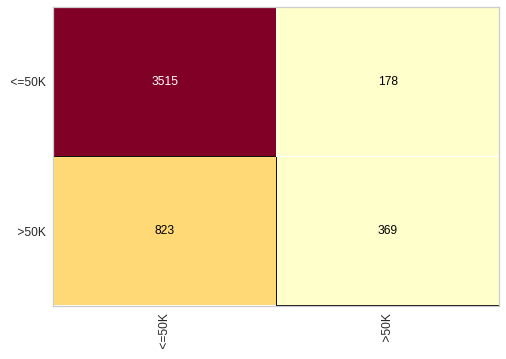

In [54]:
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_train, y_census_train)
cm.score(x_census_test, y_census_test)

In [55]:
print(classification_report(y_census_test,predict))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      3693
        >50K       0.67      0.31      0.42      1192

    accuracy                           0.80      4885
   macro avg       0.74      0.63      0.65      4885
weighted avg       0.78      0.80      0.77      4885

